In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('001_08.xlsx')
data.head()

,Data Point,Supine 8 min: Horizontal Magnitude,Supine 8 min: Horizontal Angle,Supine 8 min: Hor Planar Angle,Supine 8 min: Frontal Magnitude,Supine 8 min: Frontal Angle,Supine 8 min: Fro Planar Angle,Supine 8 min: Saggital Magnitude,Supine 8 min: Saggital Angle,Supine 8 min: Sag Planar Angle
0,1,0.02,-72.9,287.1,0.01,37.3,37.3,0.02,-13.2,166.8
1,2,0.02,-66.0,294.0,0.01,14.7,14.7,0.02,-6.6,173.4
2,3,0.02,-69.5,290.5,0.01,11.3,11.3,0.01,-4.3,175.7
3,4,0.01,-70.7,289.3,0.00,14.2,14.2,0.01,-5.0,175.0
4,5,0.01,-66.4,293.6,0.01,13.1,13.1,0.01,-5.8,174.2


In [3]:
data.columns

Index(['Data Point', 'Supine 8 min: Horizontal Magnitude',
       'Supine 8 min: Horizontal Angle', 'Supine 8 min: Hor Planar Angle',
       'Supine 8 min: Frontal Magnitude', 'Supine 8 min: Frontal Angle',
       'Supine 8 min: Fro Planar Angle', 'Supine 8 min: Saggital Magnitude',
       'Supine 8 min: Saggital Angle', 'Supine 8 min: Sag Planar Angle'],
      dtype='object')

In [4]:
Magnitude=data.groupby(['Supine 8 min: Horizontal Magnitude','Supine 8 min: Frontal Magnitude','Supine 8 min: Saggital Magnitude']).size().reset_index()

In [5]:
Magnitude

,Supine 8 min: Horizontal Magnitude,Supine 8 min: Frontal Magnitude,Supine 8 min: Saggital Magnitude,0
0,0.00,0.00,0.00,1
1,0.01,0.00,0.01,3
2,0.01,0.01,0.00,1
3,0.01,0.01,0.01,12
4,0.02,0.01,0.01,4
...,...,...,...,...
77,2.57,0.46,2.54,1
78,2.61,1.09,2.38,1
79,2.69,0.59,2.64,1
80,2.69,0.85,2.56,1


<function matplotlib.pyplot.show(close=None, block=None)>

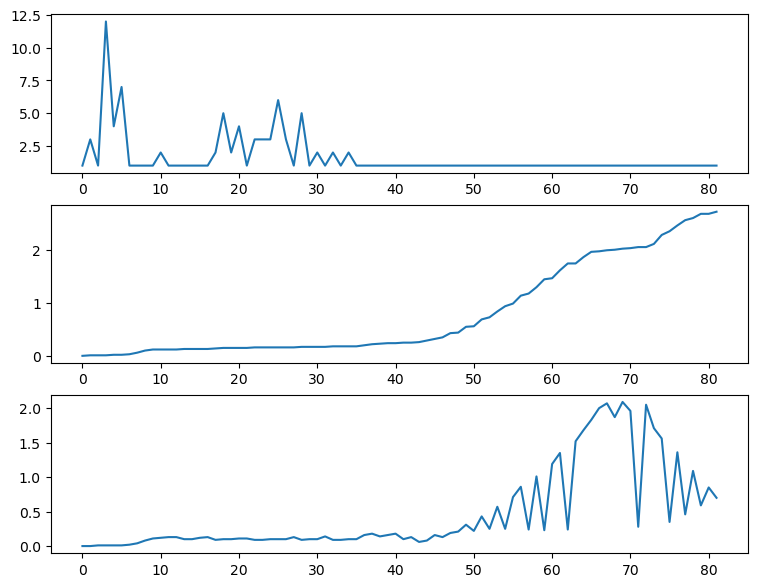

In [6]:
fig, axes =plt.subplots(3,1,figsize=(9,7))
for i,ax in enumerate(axes.flatten()):
    y=Magnitude.iloc[:,i-1].values
    ax.plot(y)
plt.show

In [7]:
x = data['Supine 8 min: Horizontal Magnitude']
y = data['Supine 8 min: Frontal Magnitude']
z = data['Supine 8 min: Saggital Magnitude']

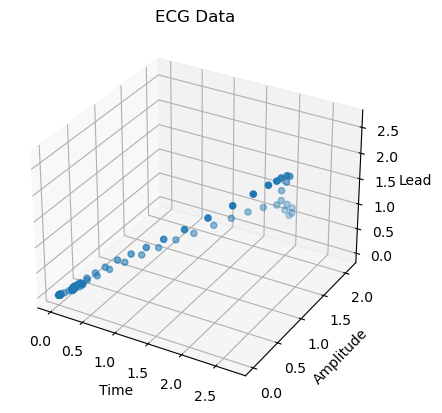

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_zlabel('Lead')
ax.set_title('ECG Data')

plt.show()

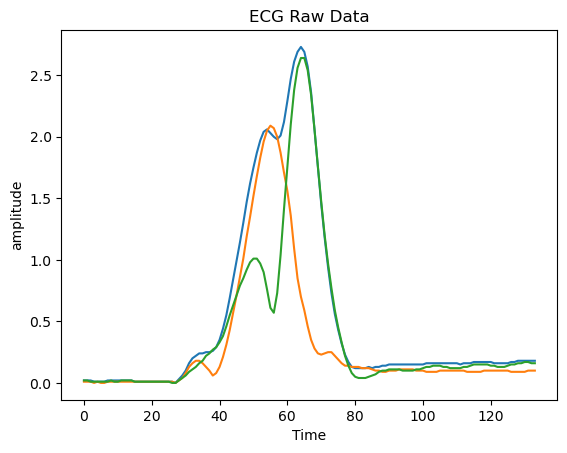

In [9]:
df = data.iloc[:, [1, 4, 7]]


fig, ax = plt.subplots()

ax.plot(df)

ax.set_xlabel('Time')
ax.set_ylabel('amplitude')
ax.set_title('ECG Raw Data')

# Show the plot
plt.show()

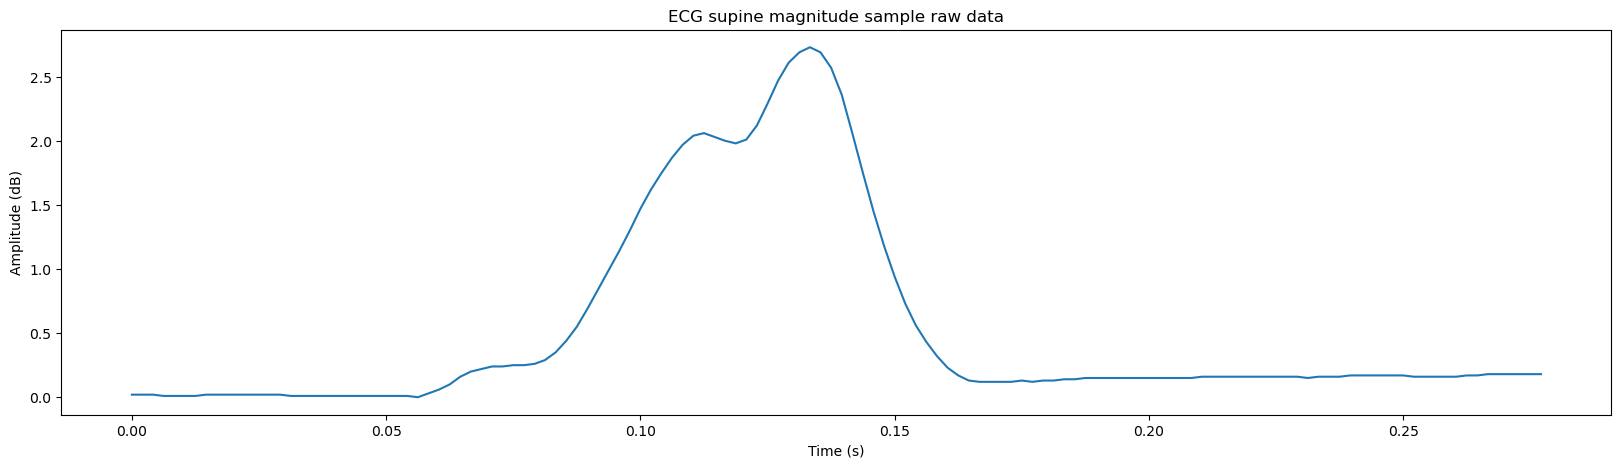

In [10]:
df = data.iloc[:, 1]
plt.figure(figsize=(20, 5))
plt.ylabel("Amplitude (dB)")
fs = 480
# Calculate time values in seconds
times = np.arange(df.shape[0], dtype='float') / fs
plt.plot(times, df)
plt.xlabel("Time (s)")
plt.title("ECG supine magnitude sample raw data")
plt.show()


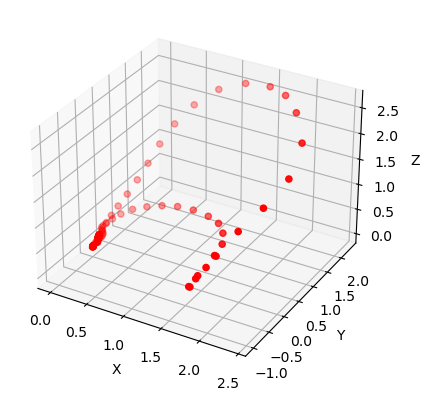

In [11]:
qrs_amplitude = data['Supine 8 min: Horizontal Magnitude']
qrs_duration = data['Supine 8 min: Frontal Magnitude']
t_amplitude = data['Supine 8 min: Saggital Magnitude']

# Combine features into a three-dimensional vector
x = qrs_amplitude * np.sin(qrs_duration)
y = qrs_amplitude * np.cos(qrs_duration)
z = t_amplitude

# Plot the resulting vector in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

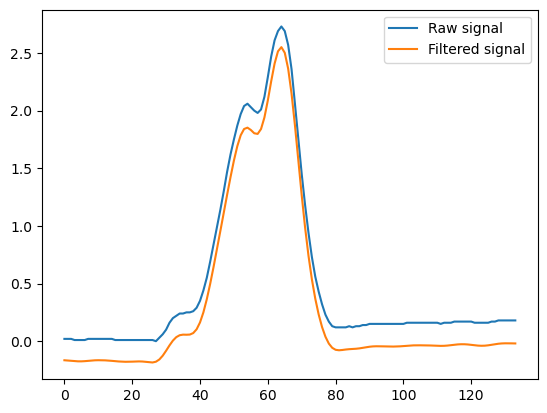

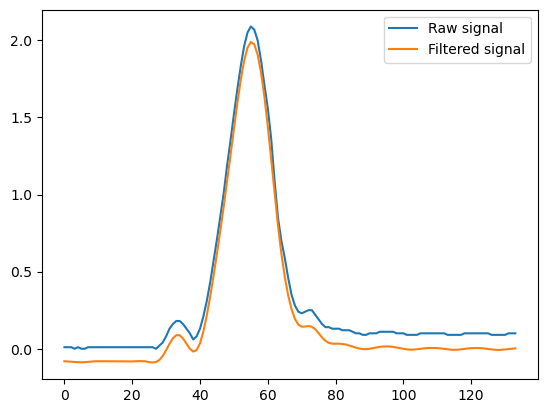

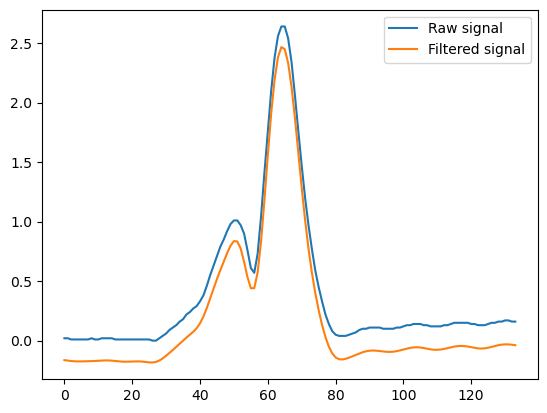

In [12]:
from scipy.signal import butter, filtfilt


# Extract raw VCG signal
signal = [data['Supine 8 min: Horizontal Magnitude'],data['Supine 8 min: Frontal Magnitude'],data['Supine 8 min: Saggital Magnitude']]

lowcut = 0.05 # Lower cutoff frequency (Hz)
highcut = 140 # Higher cutoff frequency (Hz)
order = 4 # Filter order

# Calculate the Nyquist frequency (half the sampling rate)
fs = 1000 # Sampling rate (Hz)
nyquist = 0.5 * fs 

# Define the filter frequencies in terms of the Nyquist frequency
low = lowcut / nyquist
high = highcut / nyquist
sig=[]

for i in signal:
    # Apply low-pass filter
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, i)
    sig.append(filtered_signal)

    # Plot raw and filtered signals
    plt.plot(i, label='Raw signal')
    plt.plot(filtered_signal, label='Filtered signal')
    plt.legend()
    plt.show()

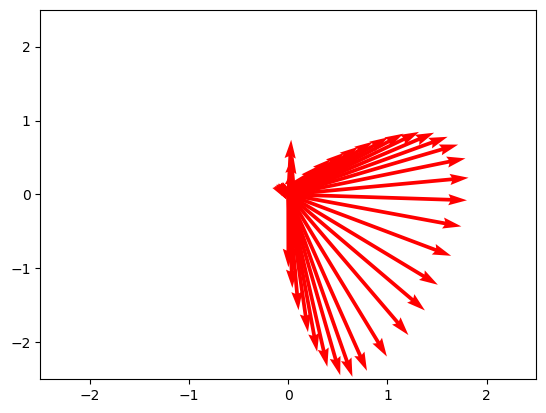

In [13]:
ha_x = data['Supine 8 min: Horizontal Angle']
ha_y = data['Supine 8 min: Frontal Angle']
ha_z = data['Supine 8 min: Saggital Angle']
ha_y=ha_y.replace(0, 1e-10)
hap_x = data['Supine 8 min: Hor Planar Angle']
hap_y = data['Supine 8 min: Fro Planar Angle']
hap_z = data['Supine 8 min: Sag Planar Angle']

ha_y = pd.to_numeric(ha_y, errors='coerce')
mean_A = ha_y.mean()

# Replace missing values with the mean value of column A
ha_y.fillna(value=mean_A)
# print(ha_y)
np_ha_x = np.array(ha_x)
np_hap_x = np.array(hap_x)
np_ha_y = np.array(ha_y)
np_hap_y = np.array(hap_y)
np_ha_z = np.array(ha_z)
np_hap_z = np.array(hap_z)


magnitude = sig[0]
angle_degrees = np_ha_x

# Convert angle to radians
angle_radians = np.radians(angle_degrees)

# Calculate components of vector
x = magnitude * np.cos(angle_radians)
y = magnitude * np.sin(angle_radians)

# Create plot with arrow representing vector
fig, ax = plt.subplots()
for i in range(133):
    ax.quiver(0, 0, x[i], y[i], angles='xy', scale_units='xy', scale=1, linewidth=0.0000005,color='red')


ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.show()

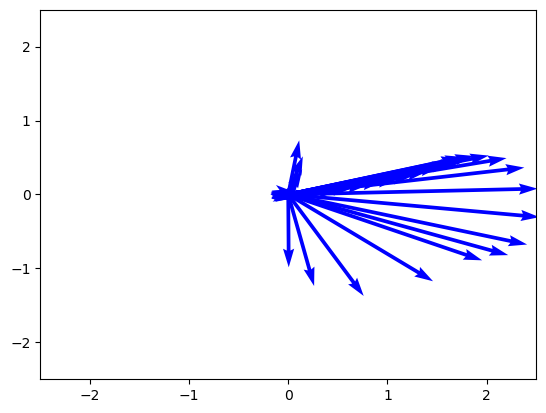

In [14]:
magnitude_y = sig[1]
angle_degrees_y = np_ha_y
# df['A'].replace(0, 1e-10, inplace=True)

# Convert angle to radians
angle_radians_y = np.radians(angle_degrees_y)

# Calculate components of vector
x1 = magnitude * np.cos(angle_radians_y)
y1 = magnitude * np.sin(angle_radians_y)

# Create plot with arrow representing vector
fig, ax = plt.subplots()
for j in range(133):
    ax.quiver(0, 0, x1[j], y1[j], angles='xy', scale_units='xy', scale=1,linewidth=0.0000005, color='blue')


ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.show()

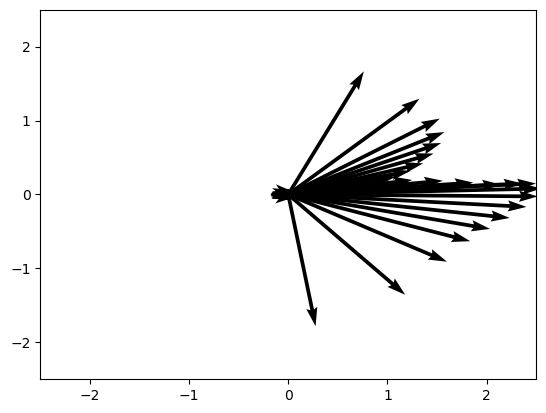

In [15]:
# In[17]:


magnitude_z = sig[2]
angle_degrees_z = np_ha_z

# Convert angle to radians
angle_radians_z = np.radians(angle_degrees_z)

# Calculate components of vector
x2 = magnitude * np.cos(angle_radians_z)
y2 = magnitude * np.sin(angle_radians_z)

# Create plot with arrow representing vector
fig, ax = plt.subplots()
for k in range(133):
    ax.quiver(0, 0, x2[k], y2[k], angles='xy', scale_units='xy', scale=1, color='black')


ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.show()

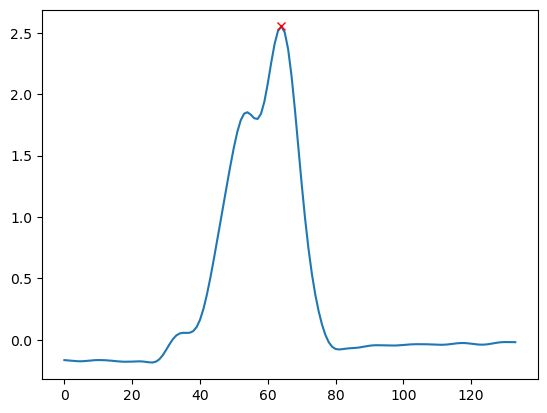

In [16]:
from scipy import signal
# Find QRS complex
window_size = int(fs * 0.1)  # Window size for peak detection in samples
peaks, _ = signal.find_peaks(sig[0], distance=window_size)

# Plot filtered signal and QRS complex
plt.plot(sig[0])
plt.plot(peaks, sig[0][peaks], 'x', color='r')
plt.show()